In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LABR dataset

- LABR stands for Large-Scale Arabic Book Reviews.
- It's a collection of over 63,000 book reviews written in Arabic.
- Each review comes with a rating on a scale of 1 to 5 stars.

### Loading Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

The review.tsv file contains :

- rating - review id - user id - book id - review

In [6]:
# loading the tsv file
SEED = 21

dataset = pd.read_csv("/content/drive/MyDrive/Parcours Academique/ENSAM/PFA/datasets/LABR/reviews.tsv", sep = '\t', header=None, names = ["rating","review_id","user_id","book_id","review"])

dataset = dataset.sample(frac=1, random_state = SEED)


dataset = dataset.sample(frac=1).reset_index(drop=True)


dataset.head(20)

,rating,review_id,user_id,book_id,review
0,4,202842568,6064435,3692091,الكتاب ده فعلا عبقري في البدايه حصلي نوع من ا...
1,5,143235856,4865181,7375409,حتماً لا يمكنني أن أختزلها في وصف .
2,4,276455328,5088542,13482280,كتاب جميل جمع فيه الاستاذ عبدالرحمن المصطاوي ...
3,5,398184231,10657567,3503947,لاول مرة تجذبني رواية لانهائها بهذا الشكل و ش...
4,4,132825053,4374579,8994051,أقصوصة في شكل رسائل من الراوي المصاب بألزهايم...
5,5,107551756,3829063,6010848,من أجمل ما قرأت
6,5,74943305,2688369,2750180,كتاب اكثر من رائع وتعلمت منهـ أفضل الطرق لكي ...
7,4,519709846,9042233,6011710,مرة اخرى قصة من القصص المرعبة الجميلة انصح بق...
8,5,72750387,2784016,320,اجمل رواية قرأتها
9,4,378007937,11328297,2244796,أسلوب جيد، محاضرات ممتعة في الجزء الثاني من ا...


In [7]:
# checking the first 5 rows of the dataset

print(dataset.head())

   rating  review_id   user_id   book_id  \
0       4  202842568   6064435   3692091   
1       5  143235856   4865181   7375409   
2       4  276455328   5088542  13482280   
3       5  398184231  10657567   3503947   
4       4  132825053   4374579   8994051   

                                              review  
0   الكتاب ده فعلا عبقري في البدايه حصلي نوع من ا...  
1                حتماً لا يمكنني أن أختزلها في وصف .  
2   كتاب جميل جمع فيه الاستاذ عبدالرحمن المصطاوي ...  
3   لاول مرة تجذبني رواية لانهائها بهذا الشكل و ش...  
4   أقصوصة في شكل رسائل من الراوي المصاب بألزهايم...  


In [8]:
# checking the first 5 rows of the dataset

print(dataset.head())

   rating  review_id   user_id   book_id  \
0       4  202842568   6064435   3692091   
1       5  143235856   4865181   7375409   
2       4  276455328   5088542  13482280   
3       5  398184231  10657567   3503947   
4       4  132825053   4374579   8994051   

                                              review  
0   الكتاب ده فعلا عبقري في البدايه حصلي نوع من ا...  
1                حتماً لا يمكنني أن أختزلها في وصف .  
2   كتاب جميل جمع فيه الاستاذ عبدالرحمن المصطاوي ...  
3   لاول مرة تجذبني رواية لانهائها بهذا الشكل و ش...  
4   أقصوصة في شكل رسائل من الراوي المصاب بألزهايم...  


In [9]:
# checking the shape of the dataset

print(dataset.shape)

(63257, 5)


In [10]:
# checking the info of the dataset

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63257 entries, 0 to 63256
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating     63257 non-null  int64 
 1   review_id  63257 non-null  int64 
 2   user_id    63257 non-null  int64 
 3   book_id    63257 non-null  int64 
 4   review     63257 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.4+ MB
None


In [11]:
# checking the description of the dataset

print(dataset.describe())

             rating     review_id       user_id       book_id
count  63257.000000  6.325700e+04  6.325700e+04  6.325700e+04
mean       3.876535  3.203361e+08  6.965693e+06  6.424708e+06
std        1.142758  1.483920e+08  3.971315e+06  3.931956e+06
min        1.000000  1.107140e+05  5.665000e+03  1.510000e+02
25%        3.000000  1.848829e+08  4.030159e+06  3.437956e+06
50%        4.000000  3.343937e+08  5.873259e+06  5.977699e+06
75%        5.000000  4.485754e+08  9.117897e+06  8.013943e+06
max        5.000000  5.643285e+08  1.843574e+07  1.756041e+07


In [12]:
# checking the missing values in the dataset

print(dataset.isnull().sum())

rating       0
review_id    0
user_id      0
book_id      0
review       0
dtype: int64


In [13]:
# checking the unique values in the dataset

print(dataset.nunique())

rating           5
review_id    60152
user_id      16486
book_id       2131
review       60090
dtype: int64


In [14]:
# checking the distribution of the rating column

print(dataset['rating'].value_counts())

rating
5    23778
4    19054
3    12201
2     5285
1     2939
Name: count, dtype: int64


In [15]:
# checking the distribution of the rating column

print(dataset['rating'].value_counts(normalize=True) * 100)

rating
5    37.589516
4    30.121568
3    19.287984
2     8.354807
1     4.646126
Name: proportion, dtype: float64


Axes(0.125,0.11;0.775x0.77)


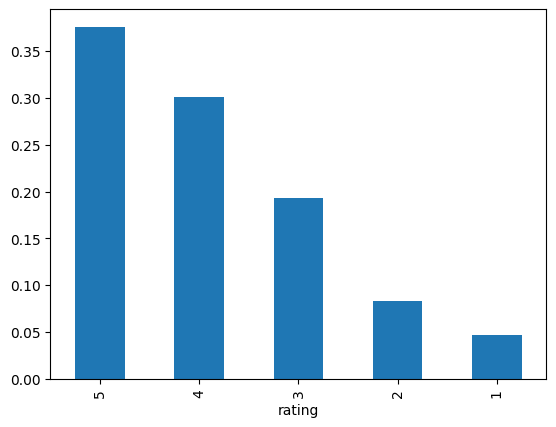

In [16]:
# checking the distribution of the rating column

print(dataset['rating'].value_counts(normalize=True).plot(kind='bar'))

### Preprocessing

In [17]:
# dropping unecessary columns

dataset = dataset.drop(['review_id','user_id','book_id'], axis=1)

In [18]:
# checking the first 5 rows of the dataset

print(dataset.head())

   rating                                             review
0       4   الكتاب ده فعلا عبقري في البدايه حصلي نوع من ا...
1       5                حتماً لا يمكنني أن أختزلها في وصف .
2       4   كتاب جميل جمع فيه الاستاذ عبدالرحمن المصطاوي ...
3       5   لاول مرة تجذبني رواية لانهائها بهذا الشكل و ش...
4       4   أقصوصة في شكل رسائل من الراوي المصاب بألزهايم...


In [19]:
# dropping the duplicated review

# checking fo duplicates in review

dataset = dataset.drop_duplicates(subset='review', keep='first')

# checking the first 5 rows of the dataset

print(dataset.head())

   rating                                             review
0       4   الكتاب ده فعلا عبقري في البدايه حصلي نوع من ا...
1       5                حتماً لا يمكنني أن أختزلها في وصف .
2       4   كتاب جميل جمع فيه الاستاذ عبدالرحمن المصطاوي ...
3       5   لاول مرة تجذبني رواية لانهائها بهذا الشكل و ش...
4       4   أقصوصة في شكل رسائل من الراوي المصاب بألزهايم...


In [20]:
# Check for duplicates
duplicates = dataset.duplicated(subset='review', keep='first')

# Print the number of duplicates
print(f"Number of duplicate reviews: {duplicates.sum()}")

Number of duplicate reviews: 0


### Data cleaning

In [21]:
import re
import string
import nltk

In [22]:
# removing links

pattern = r'https?://\S+'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, '', document))

In [23]:
# removing hashtags

pattern = r'#([\w\u0600-\u06FF]+)'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, '', document))

In [24]:
# removing whitespaces

pattern = r'\s+|\n+'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, ' ', document))

In [25]:
# removing foreign words

pattern = r'[a-zA-Z]+'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, '', document))

In [26]:
# removing punctuations

pattern = r'[^\w\s\u0600-\u06FF]+|ﷺ|۩|⓵|؟|۞|ﷻ'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, '', document))

In [27]:
# removing consecutive characters

pattern = r'(.)\1+'
dataset["review"] = dataset["review"].apply(lambda document: re.sub(pattern, r'\1', document))

In [28]:
!pip install pyarabic

In [29]:
!pip install Arabic-Stopwords

In [30]:
import arabicstopwords.arabicstopwords as stp
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
# stop words removal

stemmer = ISRIStemmer()

arabic_stopwords = stopwords.words('arabic')
arabic_stopwords.extend(stp.stopwords_list())
stop_words = {entry for entry in arabic_stopwords}

with open("/content/drive/MyDrive/Parcours Academique/ENSAM/PFA/arabic_stopwords.txt", "r", encoding="UTF-8") as file:
    for word in file:
        stop_words.add(stemmer.stem(word.strip()))

dataset["review"] = dataset["review"].apply(lambda document: ' '.join([word for word in document.split() if word not in stop_words]))

In [32]:
#
dataset.head()

,rating,review
0,4,الكتاب ده فعلا عبقري البدايه حصلي نوع انواع ال...
1,5,حتماً يمكني أختزلها وصف
2,4,كتاب جميل الاستاذ عبدالرحمن المصطاوي أبيات قصا...
3,5,لاول تجذبني رواية لانهائها الشكل شجعتني قراءة ...
4,4,أقصوصة رسائل الراوي المصاب بألزهايمر زوجته، تص...


In [33]:
def remove_stop_words(tweet: str) -> str:
    words = set(tweet.split(sep = ' '))
    return " ".join(list((words - stop_words)))

dataset["review"] = dataset["review"].apply(lambda document: remove_stop_words(document))

In [34]:
dataset.head()

,rating,review
0,4,ابطال كثره والابطال مواقف ليهم حصلي اكتشفت عبق...
1,5,يمكني حتماً أختزلها وصف
2,4,المصطاوي الامام عبدالرحمن الشافعي الديوان رحمة...
3,5,شقت اسرائيل يسمي قراءة لمستقبل الخليج تجذبني ق...
4,4,الصدمه مباشر القصيبي رحمة فكاتبها زوجته، تحتوي...


In [35]:
# normalizing the text

import pyarabic.araby as araby

dataset["review"] = dataset["review"].apply(lambda document: araby.normalize_hamza(document))

use farasa or stanza for tokenization

In [36]:
dataset.head()

,rating,review
0,4,ابطال كثره والابطال مواقف ليهم حصلي اكتشفت عبق...
1,5,يمكني حتماً ءختزلها وصف
2,4,المصطاوي الامام عبدالرحمن الشافعي الديوان رحمة...
3,5,شقت اسراءيل يسمي قراءة لمستقبل الخليج تجذبني ق...
4,4,الصدمه مباشر القصيبي رحمة فكاتبها زوجته، تحتوي...


In [37]:
# remove arabic diactrics

import pyarabic.araby as araby
dataset["review"] = dataset["review"].apply(lambda document: araby.strip_tashkeel(document))
dataset.head()

,rating,review
0,4,ابطال كثره والابطال مواقف ليهم حصلي اكتشفت عبق...
1,5,يمكني حتما ءختزلها وصف
2,4,المصطاوي الامام عبدالرحمن الشافعي الديوان رحمة...
3,5,شقت اسراءيل يسمي قراءة لمستقبل الخليج تجذبني ق...
4,4,الصدمه مباشر القصيبي رحمة فكاتبها زوجته، تحتوي...


In [38]:
# prompt: remove numbers

dataset["review"] = dataset["review"].apply(lambda document: re.sub(r'\d+', '', document))
dataset.head()

,rating,review
0,4,ابطال كثره والابطال مواقف ليهم حصلي اكتشفت عبق...
1,5,يمكني حتما ءختزلها وصف
2,4,المصطاوي الامام عبدالرحمن الشافعي الديوان رحمة...
3,5,شقت اسراءيل يسمي قراءة لمستقبل الخليج تجذبني ق...
4,4,الصدمه مباشر القصيبي رحمة فكاتبها زوجته، تحتوي...


In [39]:
!pip install farasapy

In [40]:
!pip install tkseem

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
!pip install tkseem
!pip install tnkeeh

In [43]:
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GRU, Embedding, Dense, Input, Dropout, Bidirectional

In [46]:
import tkseem as tk
import tnkeeh as tn

tn.clean_data(file_path = '/content/drive/MyDrive/Parcours Academique/ENSAM/PFA/datasets/LABR/reviews.tsv', save_path = '/content/drive/MyDrive/Parcours Academique/ENSAM/PFA/datasets/LABR/cleaned_data.txt', remove_diacritics=True,
              excluded_chars=['!', '.', '?'])
tn.split_classification_data('/content/drive/MyDrive/Parcours Academique/ENSAM/PFA/datasets/LABR/cleaned_data.txt', '/content/drive/MyDrive/Parcours Academique/ENSAM/PFA/datasets/LABR/labels.txt')
train_data, test_data, train_lbls, test_lbls = tn.read_data(mode = 1)

Remove diacritics
Saving to /content/drive/MyDrive/Parcours Academique/ENSAM/PFA/datasets/LABR/cleaned_data.txt
Split data
Save to data
Read data  ['test_data.txt', 'test_lbls.txt', 'train_data.txt', 'train_lbls.txt']


In [49]:
# Tokenization with NLTK

tokenizer = tk.SentencePieceTokenizer()
tokenizer.train('/content/drive/MyDrive/Parcours Academique/ENSAM/PFA/datasets/LABR/data.txt')

Training SentencePiece ...


In [56]:
import pandas as pd

def preprocess(tokenizer, data, labels):
    X = tokenizer.encode_sentences(data)
    y = np.array([int(lbl) for lbl in labels])
    return X, y

X, y = preprocess(tokenizer, dataset['review'], dataset['rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)


In [55]:
model = Sequential()
model.add(Embedding(tokenizer.vocab_size, 32))
model.add(Bidirectional(GRU(units = 32)))
model.add(Dense(32, activation = 'tanh'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 12, validation_split = 0.1,  batch_size= 128, shuffle = True)

Epoch 1/12
 19/338 [>.............................] - ETA: 49:39 - loss: -1.3120 - accuracy: 0.0387

In [ ]:
def classify(sentence):
  sequence = tokenizer.encode_sentences([sentence], out_length = max_length)[0]
  pred = model.predict(sequence)[0][0]
  print(pred)

In [ ]:
classify("سيئة جدا جدا")
classify("رائعة جدا")